In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('online_sales_dataset.csv')

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium


In [8]:
import sqlite3
import pandas as pd

# Create connection (in-memory database for demo, you can also use a file db)
conn = sqlite3.connect(":memory:")

# Create cursor
cur = conn.cursor()


In [11]:


# Convert to datetime
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])

# Compute sales amount (Revenue per row)
df["SalesAmount"] = df["Quantity"] * df["UnitPrice"]

df.head()



,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Discount,PaymentMethod,ShippingCost,Category,SalesChannel,ReturnStatus,ShipmentProvider,WarehouseLocation,OrderPriority,SalesAmount
0,221958,SKU_1964,White Mug,38,2020-01-01 00:00:00,1.71,37039.0,Australia,0.470000,Bank Transfer,10.79,Apparel,In-store,Not Returned,UPS,London,Medium,64.98
1,771155,SKU_1241,White Mug,18,2020-01-01 01:00:00,41.25,19144.0,Spain,0.190000,paypall,9.51,Electronics,Online,Not Returned,UPS,Rome,Medium,742.50
2,231932,SKU_1501,Headphones,49,2020-01-01 02:00:00,29.11,50472.0,Germany,0.350000,Bank Transfer,23.03,Electronics,Online,Returned,UPS,Berlin,High,1426.39
3,465838,SKU_1760,Desk Lamp,14,2020-01-01 03:00:00,76.68,96586.0,Netherlands,0.140000,paypall,11.08,Accessories,Online,Not Returned,Royal Mail,Rome,Low,1073.52
4,359178,SKU_1386,USB Cable,-30,2020-01-01 04:00:00,-68.11,NaN,United Kingdom,1.501433,Bank Transfer,NaN,Electronics,In-store,Not Returned,FedEx,NaN,Medium,2043.30


In [12]:
import sqlite3

# Create SQLite connection
conn = sqlite3.connect(":memory:")

# Save to SQL table 'orders'
df.to_sql("orders", conn, index=False, if_exists="replace")


49782

In [13]:
query = """
SELECT
    strftime('%Y', InvoiceDate) AS order_year,
    strftime('%m', InvoiceDate) AS order_month,
    SUM(SalesAmount) AS total_revenue,
    COUNT(DISTINCT InvoiceNo) AS order_volume
FROM orders
GROUP BY order_year, order_month
ORDER BY order_year, order_month;
"""

monthly_df = pd.read_sql(query, conn)
monthly_df


,order_year,order_month,total_revenue,order_volume
0,2020,01,887759.38,744
1,2020,02,835370.57,696
2,2020,03,883590.61,744
3,2020,04,908070.20,720
4,2020,05,880173.19,744
...,...,...,...,...
64,2025,05,894651.51,744
65,2025,06,838983.65,720
66,2025,07,877089.68,744
67,2025,08,913575.44,744


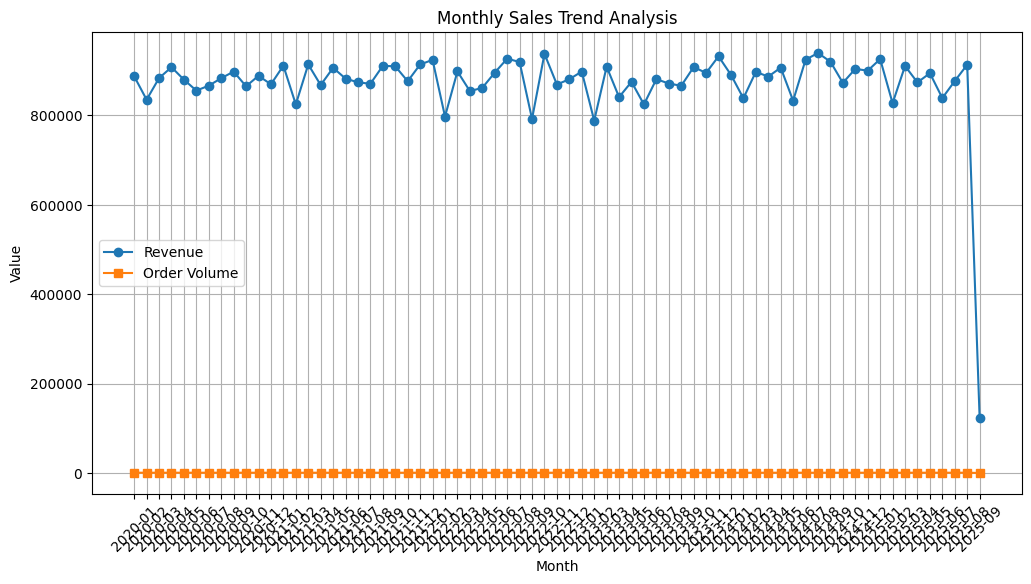

In [14]:
import matplotlib.pyplot as plt

monthly_df["year_month"] = monthly_df["order_year"] + "-" + monthly_df["order_month"]

plt.figure(figsize=(12,6))
plt.plot(monthly_df["year_month"], monthly_df["total_revenue"], marker="o", label="Revenue")
plt.plot(monthly_df["year_month"], monthly_df["order_volume"], marker="s", label="Order Volume")
plt.title("Monthly Sales Trend Analysis")
plt.xlabel("Month")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
